# Wczytanie i wstępna obróbka danych

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
%matplotlib inline

Wczytujemy pliki:

In [2]:
monet_dir = "monet_jpg"

monet_imgs = [fn for fn in os.listdir(monet_dir) if fn.endswith('.jpg')]
print(f"Ilość obrazów: {len(monet_imgs)}")

Ilość obrazów: 300


Sprawdźmy jak wygladają rozmiary, badanych przez nas plików:

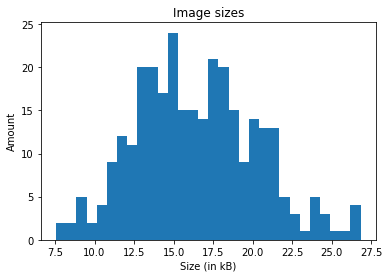

In [3]:
img_sizes = [os.stat(f'{monet_dir}/{img}').st_size/1e+3 for img in monet_imgs]

plt.hist(img_sizes, bins=30)
plt.ylabel('Amount')
plt.xlabel('Size (in kB)')
plt.title('Image sizes');

Zobaczmy kilka losowo wybranych obrazów Monet'a:

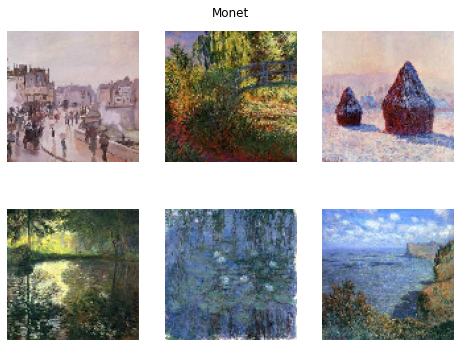

In [4]:
select_few = np.random.choice(monet_imgs, 6, replace = False)

fig = plt.figure(figsize = (8,6))
plt.title("Monet")
plt.axis('off')
for i in range(6):
    fp = f"{monet_dir}/{select_few[i]}"
    ax = fig.add_subplot(2, 3, i+1)
    fn = image.load_img(fp, target_size = (100,100), color_mode="rgb")
    plt.imshow(fn)
    plt.axis('off')
plt.show()

## Obrazy eksperymentalne:

Najpierw zamieniamy obrazy na macierze:

In [5]:
def img2np(path, list_of_filename, size = (256, 256)):
    for fn in list_of_filename:
        fp = path + fn
        current_image = image.load_img(fp, target_size = size, 
                                       color_mode = 'rgb')
        img_ts = image.img_to_array(current_image)
        img_ts_r = img_ts[:,:,0]
        img_ts_g = img_ts[:,:,1]
        img_ts_b = img_ts[:,:,2]
        img_ts = [img_ts.ravel()]
        img_ts_r = [img_ts_r.ravel()]
        img_ts_g = [img_ts_g.ravel()]
        img_ts_b = [img_ts_b.ravel()]
        try:
            full_mat = np.concatenate((full_mat, img_ts))
            full_mat_r = np.concatenate((full_mat_r, img_ts_r))
            full_mat_g = np.concatenate((full_mat_g, img_ts_g))
            full_mat_b = np.concatenate((full_mat_b, img_ts_b))
        except UnboundLocalError: 
            full_mat = img_ts
            full_mat_r = img_ts_r
            full_mat_g = img_ts_g
            full_mat_b = img_ts_b
    return full_mat, full_mat_r, full_mat_g, full_mat_b;

monet_matrix, monet_matrix_r, monet_matrix_g, monet_matrix_b = img2np(f"{monet_dir}/", monet_imgs)

Teraz policzymy obraz średni, minimalny i maksymalny licząc poszczególne wartości dla każdego pixela:

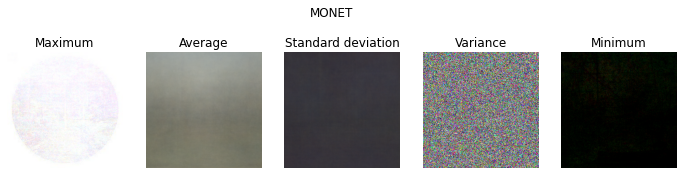

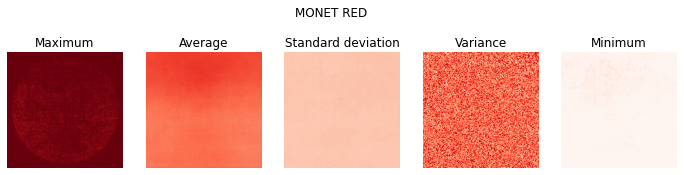

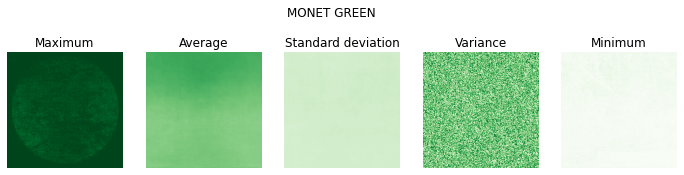

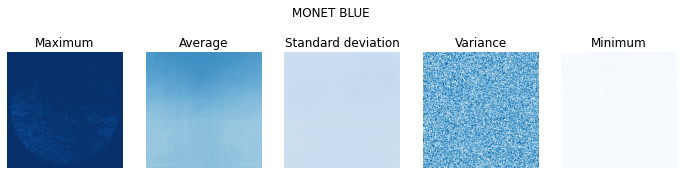

In [6]:
def mmms_img(full_mat, title, size = (256, 256, 3), c_map = "viridis"):
    fig = plt.figure(figsize = (12,3))
    fig.suptitle(title)
    max_img = np.max(full_mat, axis = 0).reshape(size)
    mean_img = np.mean(full_mat, axis = 0).reshape(size)
    min_img = np.min(full_mat, axis = 0).reshape(size)
    std_img = np.std(full_mat, axis = 0).reshape(size)
    var_img = np.var(full_mat, axis = 0).reshape(size)
    ax = fig.add_subplot(1, 5, 1)
    plt.imshow(max_img.astype(np.uint8), vmin=0, vmax=255, cmap = c_map)
    plt.title('Maximum')
    plt.axis('off')
    ax = fig.add_subplot(1, 5, 2)
    plt.imshow(mean_img.astype(np.uint8), vmin=0, vmax=255, cmap=c_map)
    plt.title('Average')
    plt.axis('off')
    ax = fig.add_subplot(1, 5, 3)
    plt.imshow(std_img.astype(np.uint8), vmin=0, vmax=255, cmap=c_map)
    plt.title('Standard deviation')
    plt.axis('off')
    ax = fig.add_subplot(1, 5, 4)
    plt.imshow(var_img.astype(np.uint8), vmin=0, vmax=255, cmap=c_map)
    plt.title('Variance')
    plt.axis('off')
    ax = fig.add_subplot(1, 5, 5)
    plt.imshow(min_img.astype(np.uint8), vmin=0, vmax=255, cmap=c_map)
    plt.title('Minimum')
    plt.axis('off')
    plt.show()
    return max_img, mean_img, std_img, var_img, min_img;

monet_stats = mmms_img(monet_matrix, 'MONET')
monet_red_stats = mmms_img(monet_matrix_r, 'MONET RED', (256,256), "Reds")
monet_green_stats = mmms_img(monet_matrix_g, 'MONET GREEN', (256,256), "Greens")
monet_blue_stats = mmms_img(monet_matrix_b, 'MONET BLUE', (256,256), "Blues")

Źródła:
* https://towardsdatascience.com/exploratory-data-analysis-ideas-for-image-classification-d3fc6bbfb2d2
* https://neptune.ai/blog/data-exploration-for-image-segmentation-and-object-detection